# Ejercicio Procesamiento del Lenguaje Natural


## Analizaremos los titulares del diario La Nacion 

# Que vamos a hacer:
<ul><li>1 - Cargar los datos</li>
    <li>2 - Limpiar datos </li>
    <li>3 - Analisis Exploratorio</li>
    <li>4 - Anáisis de Sentimiento</li>

In [1]:
%%time
# importamos librerias utiles
import requests
import pickle
from time import sleep

CPU times: user 207 ms, sys: 59.5 ms, total: 267 ms
Wall time: 1.13 s


## La Nacion

# 1 - Cargar los Datos

In [2]:
%%time
# lo metemos en un Panda's dataframe
import pandas as pd
pd.set_option('max_colwidth',150)
import pickle
# Cargamos el csv de los titulares de La Nacion en un dataframe

data_ln = pd.read_csv('ln_por_year.csv',index_col=0 )
data_ln.index.name=None
data_ln

CPU times: user 885 ms, sys: 214 ms, total: 1.1 s
Wall time: 4.15 s


,Texto
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...


In [3]:
%%time
# Veamos uno de los contenidos
data_ln.Texto.loc[2007]

CPU times: user 1.04 ms, sys: 42 µs, total: 1.09 ms
Wall time: 14.5 ms


'cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes  juegos que acaban de llegar y algunos próximos estrenos la importancia de nivelar hacia arriba un buen año para los libros de comunicación empresarial polémico cambio de metodología del indec breves polideportivo preparados para la acción catálogo con aroma veraniego best sellers la vuelta de la vida transparente feedback el festival de jazz tuvo un cierre deslucido creció un   la inversión publicitaria cartas de lectores gaudio empezó el año con una derrota ante ferrer el reencuentro con dos grandes la península  cada vez más globalizada variedades best sellers un foro de nuevos medios  auspiciado por lanacion com cartas de lectores el rol de los brujos sigue creciendo internet sos vos pocos cambios en el ranking de la fifa ya hay uno menos en  gran hermano  tormenta diplomática por el gran hermano británico se vienen los rusos cartas de lectores bolívar ganó en el duelo de punteros best sellers jorge r

# 3 - Limpiar los Datos

In [4]:
%%time
# Aplicaremos varios rounds de limpieza
import re
import string

def clean_text_round1(text):
    
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

CPU times: user 19 µs, sys: 4 µs, total: 23 µs
Wall time: 32.4 µs


In [5]:
%%time
# vemos la primer limpieza
data_ln_clean = pd.DataFrame(data_ln.Texto.apply(round1))
data_ln_clean

CPU times: user 43.4 ms, sys: 11 µs, total: 43.4 ms
Wall time: 43.1 ms


,Texto
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...


In [6]:
%%time
# Segundo round
def clean_text_round2(text):
    
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

CPU times: user 13 µs, sys: 3 µs, total: 16 µs
Wall time: 25.5 µs


In [7]:
%%time
# veamos como queda
data_ln_clean = pd.DataFrame(data_ln_clean.Texto.apply(round2))
data_ln_clean

CPU times: user 2.79 ms, sys: 0 ns, total: 2.79 ms
Wall time: 2.76 ms


,Texto
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...


In [9]:
%%time
# Como no tenemos un Lemmatizer en español, hacemos manualmente algunas conversiones
# OJO: esto realmente no se hace a mano!!!

def detectadas(palabra):
    eliminar_s = ('libreros','textos','papelitos','monedas','páginas','anécdotas','perros','cuadernos','blogs',
                  'revistas','caballos','vecinos','madres','puntos','ricos','libros')
    if palabra in eliminar_s :
        return palabra[:-1]
    eliminar_es = ('mundiales','lectores','campeones','maníes','ustedes','autores')
    if palabra in eliminar_es:
        return palabra[:-2]
    return palabra

def clean_text_round3(text):
    '''.'''
    return " ".join([detectadas(word) for word in text.split()])
    
round3 = lambda x: clean_text_round3(x)

CPU times: user 12 µs, sys: 2 µs, total: 14 µs
Wall time: 24.3 µs


In [10]:
%%time
#vemos como queda
data_ln_clean = pd.DataFrame(data_ln_clean.Texto.apply(round3))
data_ln_clean

CPU times: user 33.9 ms, sys: 4.43 ms, total: 38.3 ms
Wall time: 37.4 ms


,Texto
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector int...
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la import...
2008,cartas de lector el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concurso l...
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo camin...
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válido la ...
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la li...
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escritor...
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago un ...
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos el ...


In [11]:
%%time
# Esto es un nuevo campo por si quisieramos agregar alguna info adicional a cada año
# Nuestro caso repetimos los años, nos servirá para alguna visualización
full_names = ['2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']

data_ln['full_name'] = full_names
data_ln

CPU times: user 1.92 ms, sys: 407 µs, total: 2.33 ms
Wall time: 2.09 ms


,Texto,full_name
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...,2006
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...,2007
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...,2008
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...,2009
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...,2010
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...,2011
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...,2012
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...,2013
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...,2014
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...,2015


In [12]:
%%time
# Hacemos el pickle para usar más adelante
data_ln.to_pickle("corpus_ln.pkl")

CPU times: user 2.35 ms, sys: 492 µs, total: 2.84 ms
Wall time: 2.42 ms


In [13]:
%%time
data_ln.Texto[0:255]

CPU times: user 858 µs, sys: 182 µs, total: 1.04 ms
Wall time: 1.05 ms


2006    bajo el signo del terror apple renovó toda la familia  ipod  por las canchas argentinos en francia ¿un loco suelto  en hollywood  cartas de lector...
2007    cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes  juegos que acaban de llegar y algunos próximos estrenos la impor...
2008    cartas de lectores el misterio de rimbaud en la playa  al ritmo de la moda  la música y los celulares el futuro de nuestra lengua bases del concur...
2009    la mejor publicidad del año  episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...
2010    el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...
2011    dakar    mendoza aporta  participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado  pero hoy es válid...
2012    concurso el album de la argentina  bases víc

In [14]:
%%time
# Creamos una matriz de palabras y quitamos las palabras mas comunes del castellano
from sklearn.feature_extraction.text import CountVectorizer

# En spanish.txt tenemos una lista de palabras comunes 
with open('spanish.txt') as f:
    lines = f.read().splitlines()

cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(data_ln_clean.Texto)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_ln_clean.index
data_dtm

CPU times: user 582 ms, sys: 172 ms, total: 754 ms
Wall time: 2.81 s


,abandona,abandonar,abandonó,abanico,abasto,abdicación,abdominal,abierta,abiertas,abierto,...,órganos,última,últimamente,último,últimos,única,único,únicos,útil,útiles
2006,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,1,0,0,0,0,0,...,0,2,0,4,0,1,0,0,0,1
2008,0,0,0,1,0,0,0,0,0,0,...,0,0,1,5,0,1,0,0,0,0
2009,0,0,0,0,0,0,0,0,1,0,...,0,0,0,2,1,0,0,0,0,0
2010,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,1,1,1,0
2012,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2013,0,0,0,0,0,0,0,2,0,0,...,0,0,0,1,0,0,1,0,0,0
2014,0,0,0,0,0,1,1,3,0,1,...,0,0,0,2,0,0,0,0,0,0
2015,0,1,0,0,0,0,0,0,0,2,...,0,2,0,1,1,0,0,0,0,0


In [15]:
%%time
# Lo guardamos como pickle
data_dtm.to_pickle("dtm_ln.pkl")

CPU times: user 6.07 ms, sys: 500 µs, total: 6.57 ms
Wall time: 5.9 ms


In [16]:
%%time
# Lo guardamos como pickle también
data_ln_clean.to_pickle('data_ln_clean.pkl')
pickle.dump(cv, open("cv.pkl", "wb"))

CPU times: user 34 ms, sys: 7.9 ms, total: 41.9 ms
Wall time: 42.1 ms


# 4 - Análisis Exploratorio

In [38]:
%%time
# Leemos el documento
import pandas as pd

data_ln = pd.read_pickle('dtm_ln.pkl')
data_ln = data_ln.transpose()
data_ln.head()

CPU times: user 11.8 ms, sys: 3.97 ms, total: 15.8 ms
Wall time: 12.4 ms


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
abandona,0,0,0,0,0,0,1,0,0,0,0
abandonar,0,0,0,0,0,0,0,0,0,1,0
abandonó,0,0,0,0,0,0,1,0,0,0,0
abanico,0,0,1,0,0,0,0,0,0,0,0
abasto,0,1,0,0,1,0,1,0,0,0,0


In [39]:
%%time
# Buscamos las palabras mas comunes por año
top_dict = {}
for c in data_ln.columns:
    top = data_ln[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict

CPU times: user 18.3 ms, sys: 160 µs, total: 18.4 ms
Wall time: 17.1 ms


{2006: [('polideportivo', 9),
  ('lector', 7),
  ('cartas', 7),
  ('sellers', 5),
  ('best', 5),
  ('libro', 5),
  ('hoy', 3),
  ('dos', 3),
  ('aires', 3),
  ('buenos', 3),
  ('rural', 3),
  ('mejor', 3),
  ('xp', 2),
  ('controles', 2),
  ('día', 2),
  ('crece', 2),
  ('poder', 2),
  ('obras', 2),
  ('premiaron', 2),
  ('windows', 2),
  ('salto', 2),
  ('peso', 2),
  ('premio', 2),
  ('recibir', 2),
  ('país', 2),
  ('sorín', 2),
  ('exportador', 2),
  ('díaz', 2),
  ('pasa', 2),
  ('mundo', 2)],
 2007: [('lector', 19),
  ('cartas', 17),
  ('libro', 15),
  ('best', 14),
  ('cine', 14),
  ('sellers', 13),
  ('gran', 13),
  ('nuevo', 8),
  ('potter', 8),
  ('harry', 8),
  ('fiesta', 7),
  ('mundo', 7),
  ('arte', 7),
  ('breves', 7),
  ('año', 7),
  ('vida', 7),
  ('rock', 6),
  ('música', 6),
  ('hermano', 6),
  ('nacion', 6),
  ('polideportivo', 6),
  ('hoy', 6),
  ('argentino', 5),
  ('viaje', 5),
  ('crisis', 5),
  ('semana', 5),
  ('según', 5),
  ('vuelve', 5),
  ('muestra', 5),
 

In [40]:
%%time
# Las mostramos un poco mas ordenadas
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

2006
polideportivo, lector, cartas, sellers, best, libro, hoy, dos, aires, buenos, rural, mejor, xp, controles
---
2007
lector, cartas, libro, best, cine, sellers, gran, nuevo, potter, harry, fiesta, mundo, arte, breves
---
2008
lector, cartas, concurso, fiesta, argentina, bases, nuevo, mejor, novela, nueva, nacion, cine, música, gran
---
2009
agenda, mejores, internet, videos, insólitos, argentina, lector, mundo, cartas, crisis, nueva, nuevo, mejor, argentinas
---
2010
mejores, videos, insólitos, internet, aires, buenos, cine, mundial, nuevos, gran, noche, año, argentina, lector
---
2011
argentina, libro, gran, nuevo, cinco, polideportivo, hoy, historia, común, mejor, gadgets, cómo, geekmanía, lector
---
2012
gran, nueva, argentina, fiesta, nuevo, festival, país, cómo, windows, mejor, mundo, noche, obra, gobierno
---
2013
cultural, agenda, argentina, libro, feria, mundo, nueva, buenos, papa, cómo, aires, nuevo, país, presentó
---
2014
mundial, nuevo, argentina, fiesta, hoy, cómo, mund

In [41]:
%%time
# Agregamos esas palabras a la lista de stopwords
from collections import Counter

words = []
for anio in data_ln.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
        
words

CPU times: user 591 µs, sys: 0 ns, total: 591 µs
Wall time: 605 µs


['polideportivo',
 'lector',
 'cartas',
 'sellers',
 'best',
 'libro',
 'hoy',
 'dos',
 'aires',
 'buenos',
 'rural',
 'mejor',
 'xp',
 'controles',
 'día',
 'crece',
 'poder',
 'obras',
 'premiaron',
 'windows',
 'salto',
 'peso',
 'premio',
 'recibir',
 'país',
 'sorín',
 'exportador',
 'díaz',
 'pasa',
 'mundo',
 'lector',
 'cartas',
 'libro',
 'best',
 'cine',
 'sellers',
 'gran',
 'nuevo',
 'potter',
 'harry',
 'fiesta',
 'mundo',
 'arte',
 'breves',
 'año',
 'vida',
 'rock',
 'música',
 'hermano',
 'nacion',
 'polideportivo',
 'hoy',
 'argentino',
 'viaje',
 'crisis',
 'semana',
 'según',
 'vuelve',
 'muestra',
 'empresas',
 'lector',
 'cartas',
 'concurso',
 'fiesta',
 'argentina',
 'bases',
 'nuevo',
 'mejor',
 'novela',
 'nueva',
 'nacion',
 'cine',
 'música',
 'gran',
 'premio',
 'polideportivo',
 'ensayo',
 'récord',
 'ganó',
 'potter',
 'arte',
 'año',
 'noche',
 'sudamericana',
 'años',
 'argentinos',
 'libro',
 'feedback',
 'festival',
 'publicidad',
 'agenda',
 'mejores'

In [42]:
Counter(words).most_common()

[('libro', 11),
 ('lector', 9),
 ('mundo', 9),
 ('argentina', 9),
 ('cartas', 8),
 ('nuevo', 8),
 ('nueva', 8),
 ('polideportivo', 7),
 ('mejor', 7),
 ('gran', 7),
 ('fiesta', 7),
 ('año', 7),
 ('arte', 6),
 ('aires', 5),
 ('buenos', 5),
 ('noche', 5),
 ('cómo', 5),
 ('hoy', 4),
 ('premio', 4),
 ('cine', 4),
 ('argentino', 4),
 ('semana', 4),
 ('vuelve', 4),
 ('festival', 4),
 ('mundial', 4),
 ('dos', 3),
 ('país', 3),
 ('años', 3),
 ('feedback', 3),
 ('historia', 3),
 ('gobierno', 3),
 ('dakar', 3),
 ('feria', 3),
 ('tras', 3),
 ('fin', 3),
 ('sellers', 2),
 ('best', 2),
 ('windows', 2),
 ('potter', 2),
 ('rock', 2),
 ('música', 2),
 ('nacion', 2),
 ('crisis', 2),
 ('según', 2),
 ('bases', 2),
 ('récord', 2),
 ('ganó', 2),
 ('argentinos', 2),
 ('agenda', 2),
 ('mejores', 2),
 ('internet', 2),
 ('videos', 2),
 ('insólitos', 2),
 ('argentinas', 2),
 ('nuevos', 2),
 ('casa', 2),
 ('días', 2),
 ('premios', 2),
 ('cristina', 2),
 ('boca', 2),
 ('síntesis', 2),
 ('rural', 1),
 ('xp', 1),
 (

In [43]:
%%time
# Las mas repetidas las descartaremos
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

CPU times: user 3.35 ms, sys: 0 ns, total: 3.35 ms
Wall time: 2.2 ms


['libro',
 'lector',
 'mundo',
 'argentina',
 'cartas',
 'nuevo',
 'nueva',
 'polideportivo',
 'mejor',
 'gran',
 'fiesta',
 'año']

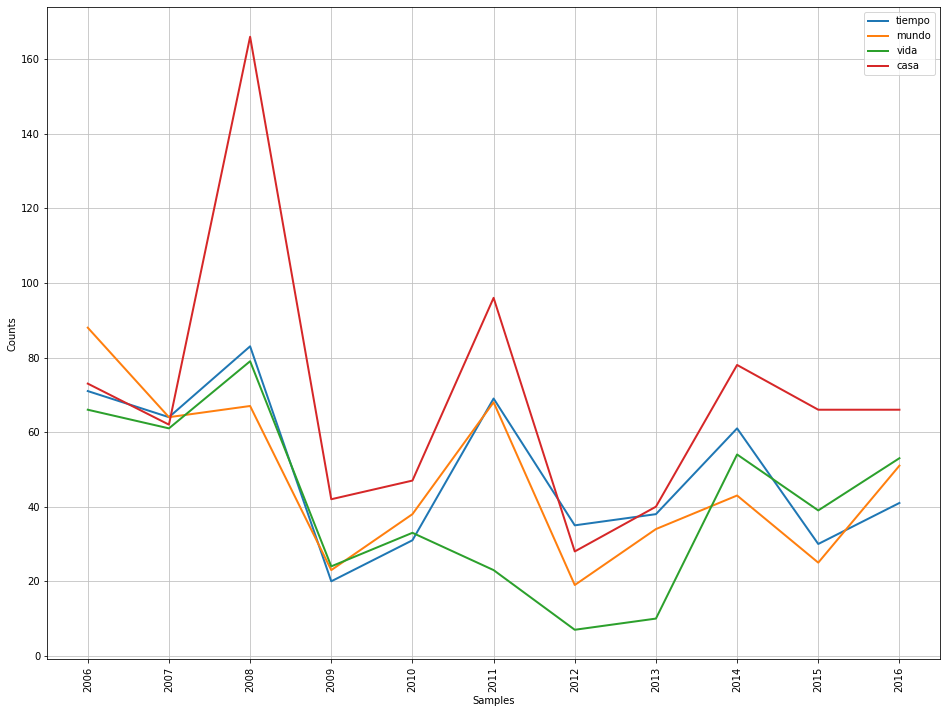

CPU times: user 776 ms, sys: 152 µs, total: 776 ms
Wall time: 773 ms


In [44]:
%%time
# A partir de unos textos genericos, creamos un corpus linguistico (ejemplos de uso)
# usamos un blog
anios = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016']
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/home/administrador/git/python/tp_ds/blog/' 
wordlists = PlaintextCorpusReader(corpus_root, '.*', encoding='latin-1')


cfd = nltk.ConditionalFreqDist(
        (word,genre)
        for genre in anios
        for w in wordlists.words(genre + '.txt')
        for word in ['casa','mundo','tiempo','vida']
        if w.lower().startswith(word) )
cfd.plot()

In [47]:
%%time
# Como no alcanzan las palabras del diccionario, debemos agregar mas stopwords
# extraidas manualmente del texto
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Leemos los textos limpios
data_ln_clean = pd.read_pickle('data_ln_clean.pkl')

# Agregamos algunas stopwords de nuestra cosecha
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['alex','andrés','asi','andres','así','año','alejandro','alfonso','allí','alguien',
                 'basdala','bernardo','bien',
                 'cosa','cosas','costoya','costa','cinco','celoni','cuatro','cómo','casi','colo','caprio','českomoravský','české','costa','canoso','carla','comequechu',
                 'dos','dice','decir','días','dije','digo','diez',
                 'ésa', 'ésas', 'ése', 'ésos', 'ésta', 'éstas', 'éste', 'ésto', 'éstos',
                 'fernando','fenwick',
                 'gelós','gente',
                 'hornby','hoy','horacio','horas','hará','hans','hacía','haber',
                 'iveta',
                 'jesús','jorge','juan',
                 'karen',
                 'lucas','luego', 'luis',
                 'mirta','mientras','menos','mónica','medio','mil','moncho','momento','mañana','mejor',
                 'narcís','número','noche','nadie',
                 'ojos',
                 'primer','primera','pase','pablo','pepe','pack','peter', 'pues','prieto','politto','pol','paola','puede','próximo','podrán','podía',
                 'quizá','quizás','quince','quién','quiero',
                 'rato',
                 'sólo','solamente','sakhan','šeredova','seis','šeredovà','seselovsky','solo','salas','sant','sino','se','sé','sabés','semana','soto','sido','solamente',
                 'tres','tan','todas','trece','toda','todavía','tarde','tener',
                 'uno','usted',
                 'veces','ver','ve','vos','va','voy',
                 'waiser','woung'
                ]
for pal in more_stop_words:
    stop_words.append(pal)


cv = CountVectorizer(stop_words=stop_words)
data_ln_cv = cv.fit_transform(data_ln_clean.Texto)
data_ln_stop = pd.DataFrame(data_ln_cv.toarray(), columns=cv.get_feature_names())
data_ln_stop.index = data_ln_clean.index

# guardamos por las dudas
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_ln_stop.to_pickle("dtm_stop.pkl")

CPU times: user 69.7 ms, sys: 0 ns, total: 69.7 ms
Wall time: 69.5 ms


In [48]:
%%time
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

CPU times: user 226 µs, sys: 0 ns, total: 226 µs
Wall time: 247 µs


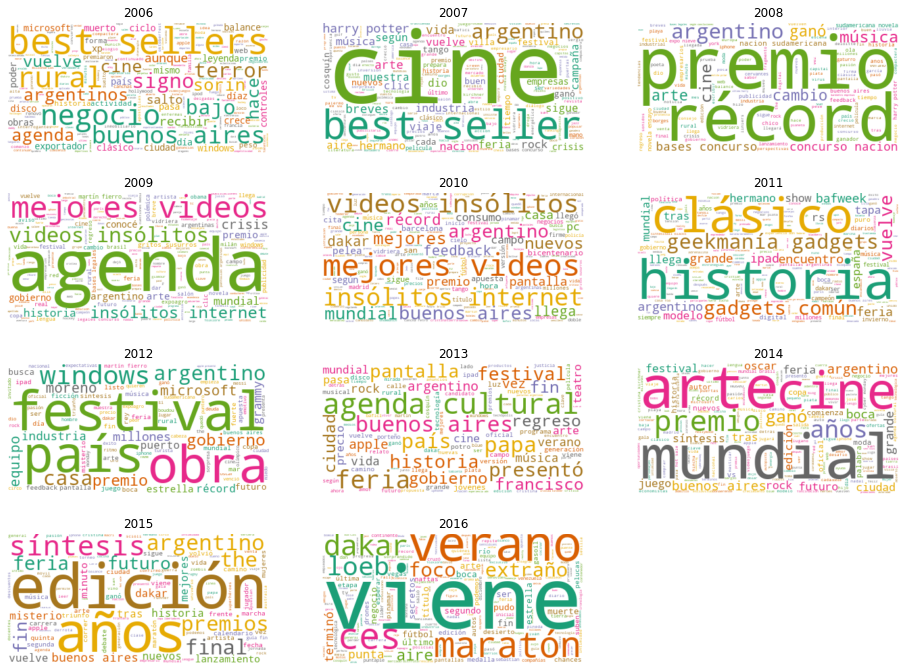

CPU times: user 2.49 s, sys: 128 ms, total: 2.62 s
Wall time: 2.65 s


In [50]:
%%time
# Dibujamos las nubes de palabras
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16,12]

#anios = ['2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

# Create subplots for each anio
for index, anio in enumerate(data_ln.columns):
    wc.generate(data_ln_clean.Texto[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(anios[index])
    
plt.show()

# 5 - Análisis de Sentimiento

In [51]:
%%time
# Leeremos el corpus que aún preserva el orden de las palabras
import pandas as pd

data_ln = pd.read_pickle('corpus_ln.pkl')
data_ln

CPU times: user 6.81 ms, sys: 42 µs, total: 6.85 ms
Wall time: 4.54 ms


,Texto,full_name
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...,2006
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...,2007
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...,2008
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...,2009
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...,2010
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...,2011
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...,2012
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...,2013
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...,2014
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...,2015


In [52]:
%%time
# Creamos funciones auxiliares para procesar el texto
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity

# Realmente lo traducimos al inglés pues el analisis de sentimiento de TextBlob no funciona en Español :(
traducir = lambda x: TextBlob(x).translate(to="en")

data_ln['blob_en'] = data_ln['Texto'].apply(traducir)
data_ln['polarity'] = data_ln['blob_en'].apply(pol2)
data_ln['subjectivity'] = data_ln['blob_en'].apply(sub2)
data_ln

CPU times: user 1.01 s, sys: 1.26 ms, total: 1.01 s
Wall time: 4.06 s


,Texto,full_name,blob_en,polarity,subjectivity
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...,2006,"(U, n, d, e, r, , t, h, e, , s, i, g, n, , o, f, , t, e, r, r, o, r, ,, , A, p, p, l, e, , r, e, n, e, w, e, d, , t, h, e, , e, n, t, i, r...",0.203939,0.394890
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...,2007,"(h, o, w, , t, o, , k, n, o, w, , i, f, , y, o, u, r, , c, o, m, p, u, t, e, r, , w, i, l, l, , b, e, , a, b, l, e, , t, o, , u, s, e, ...",0.208520,0.431694
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...,2008,"(r, e, a, d, e, r, s, ', , l, e, t, t, e, r, s, , t, h, e, , m, y, s, t, e, r, y, , o, f, , r, i, m, b, a, u, d, , o, n, , t, h, e, , b, e...",0.154556,0.424543
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...,2009,"(t, h, e, , b, e, s, t, , p, u, b, l, i, c, i, t, y, , o, f, , t, h, e, , y, e, a, r, , e, p, i, s, o, d, e, , i, i, , s, o, m, e, t, h, i...",0.243064,0.465497
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...,2010,"(t, h, e, , b, e, g, i, n, n, i, n, g, , o, f, , t, h, e, , d, a, k, a, r, , w, a, s, , a, , p, u, r, e, , e, m, o, t, i, o, n, , i, n, ...",0.212595,0.440779
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...,2011,"(d, a, k, a, r, , m, e, n, d, o, z, a, , b, r, i, n, g, s, , p, a, r, t, i, c, i, p, a, n, t, s, , u, n, d, e, r, , t, h, e, , h, e, a, t, ...",0.137775,0.433609
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...,2012,"(c, o, n, t, e, s, t, , t, h, e, , a, l, b, u, m, , o, f, , A, r, g, e, n, t, i, n, a, , b, a, s, e, s, , v, i, c, t, i, m, s, , w, r, o, n...",0.182623,0.437851
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...,2013,"(t, h, e, y, , a, d, d, , a, , g, i, r, l, , t, h, e, y, , f, i, l, m, , t, h, e, , b, e, a, t, i, n, g, , a, n, d, , t, h, e, y, , u, p...",0.176689,0.433935
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...,2014,"(T, h, e, , b, i, g, , b, o, y, , w, h, o, , c, o, n, t, i, n, u, e, s, , t, o, , s, u, r, p, r, i, s, e, , u, s, , o, n, , t, i, p, , t...",0.146375,0.420615
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...,2015,"(t, h, e, y, , s, u, s, p, e, c, t, , t, h, a, t, , l, o, l, a, , c, h, o, m, n, a, l, e, z, , w, o, u, l, d, , h, a, v, e, , k, i, l, l, e...",0.145093,0.414973


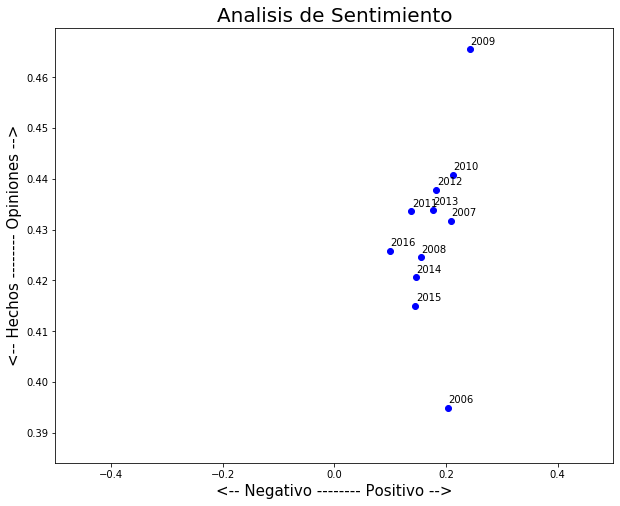

CPU times: user 213 ms, sys: 11.6 ms, total: 225 ms
Wall time: 223 ms


In [54]:
%%time
# Dibujemos los resultados
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, anio in enumerate(data_ln.index):
    x = data_ln.polarity.loc[anio]
    y = data_ln.subjectivity.loc[anio]
    plt.scatter(x, y, color='blue')
    #plt.text(x+.001, y+.001, data['full_names'][index], fontsize=10)
    plt.text(x+.001, y+.001, anio, fontsize=10)
    #plt.xlim(-0.051, 0.152) 
    plt.xlim(-0.5, 0.5) 
    
plt.title('Analisis de Sentimiento', fontsize=20)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()

## Variacion del sentimiento con el tiempo

In [55]:
%%time
# Partimos cada año en 12 piezas correspondiente a los meses
import numpy as np
import math

def split_text(text, n=12):
        
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

CPU times: user 31 µs, sys: 2 µs, total: 33 µs
Wall time: 43.9 µs


In [56]:
# Veamos que datos tenemos
data_ln

,Texto,full_name,blob_en,polarity,subjectivity
2006,bajo el signo del terror apple renovó toda la familia ipod por las canchas argentinos en francia ¿un loco suelto en hollywood cartas de lector...,2006,"(U, n, d, e, r, , t, h, e, , s, i, g, n, , o, f, , t, e, r, r, o, r, ,, , A, p, p, l, e, , r, e, n, e, w, e, d, , t, h, e, , e, n, t, i, r...",0.203939,0.394890
2007,cómo saber si tu computadora será capaz de usar windows vista sin inconvenientes juegos que acaban de llegar y algunos próximos estrenos la impor...,2007,"(h, o, w, , t, o, , k, n, o, w, , i, f, , y, o, u, r, , c, o, m, p, u, t, e, r, , w, i, l, l, , b, e, , a, b, l, e, , t, o, , u, s, e, ...",0.208520,0.431694
2008,cartas de lectores el misterio de rimbaud en la playa al ritmo de la moda la música y los celulares el futuro de nuestra lengua bases del concur...,2008,"(r, e, a, d, e, r, s, ', , l, e, t, t, e, r, s, , t, h, e, , m, y, s, t, e, r, y, , o, f, , r, i, m, b, a, u, d, , o, n, , t, h, e, , b, e...",0.154556,0.424543
2009,la mejor publicidad del año episodio ii algo sobre los vascos mundo extremo un recorrido por los tesoros culturales de la argentina el largo cami...,2009,"(t, h, e, , b, e, s, t, , p, u, b, l, i, c, i, t, y, , o, f, , t, h, e, , y, e, a, r, , e, p, i, s, o, d, e, , i, i, , s, o, m, e, t, h, i...",0.243064,0.465497
2010,el inicio del dakar fue a pura emoción en buenos aires un año para consolidar el crecimiento parte de los festejos por el bicentenario gritos y su...,2010,"(t, h, e, , b, e, g, i, n, n, i, n, g, , o, f, , t, h, e, , d, a, k, a, r, , w, a, s, , a, , p, u, r, e, , e, m, o, t, i, o, n, , i, n, ...",0.212595,0.440779
2011,dakar mendoza aporta participantes bajo el calor de la admiración cómo manejarse con la nueva ortografía ayer fue censurado pero hoy es válid...,2011,"(d, a, k, a, r, , m, e, n, d, o, z, a, , b, r, i, n, g, s, , p, a, r, t, i, c, i, p, a, n, t, s, , u, n, d, e, r, , t, h, e, , h, e, a, t, ...",0.137775,0.433609
2012,concurso el album de la argentina bases víctimas erradas en la masacre de rosario la inflación hace bajar el ingreso de turistas extranjeros la l...,2012,"(c, o, n, t, e, s, t, , t, h, e, , a, l, b, u, m, , o, f, , A, r, g, e, n, t, i, n, a, , b, a, s, e, s, , v, i, c, t, i, m, s, , w, r, o, n...",0.182623,0.437851
2013,agreden a una chica filman la paliza y suben el video a las redes sociales actualidad críticas puerta abierta a la escuela del futuro hay escrit...,2013,"(t, h, e, y, , a, d, d, , a, , g, i, r, l, , t, h, e, y, , f, i, l, m, , t, h, e, , b, e, a, t, i, n, g, , a, n, d, , t, h, e, y, , u, p...",0.176689,0.433935
2014,el niño grande que nos sigue sorprendiendo en punta la fiesta siguió en la playa nervo mujeres bellas y de beats fuertes navidad junto al lago...,2014,"(T, h, e, , b, i, g, , b, o, y, , w, h, o, , c, o, n, t, i, n, u, e, s, , t, o, , s, u, r, p, r, i, s, e, , u, s, , o, n, , t, i, p, , t...",0.146375,0.420615
2015,sospechan que a lola chomnalez la habrían asesinado el sábado en más del de las ventas y pagos online se hará desde un móvil versos peregrinos...,2015,"(t, h, e, y, , s, u, s, p, e, c, t, , t, h, a, t, , l, o, l, a, , c, h, o, m, n, a, l, e, z, , w, o, u, l, d, , h, a, v, e, , k, i, l, l, e...",0.145093,0.414973


In [57]:
%%time
# Juntamos todos los textos
list_pieces = []
for t in data_ln.blob_en:#transcript:
    split = split_text(t,12)
    list_pieces.append(split)   
#list_pieces

CPU times: user 14.3 ms, sys: 108 µs, total: 14.4 ms
Wall time: 13 ms


In [58]:
# Cada lista tiene n elementos
len(list_pieces)

11

In [59]:
# Ahora lo partimos en piezas de 10
len(list_pieces[0])

12

In [60]:
%%time
# Calculamos la polaridad de cada pieza de texto

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        #polarity_piece.append(TextBlob(p).translate(to="en").sentiment.polarity)
        polarity_piece.append(p.sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

CPU times: user 141 ms, sys: 263 µs, total: 141 ms
Wall time: 141 ms


[[0.030027472527472527,
  0.5666666666666667,
  -0.025,
  0.1590909090909091,
  0.23611111111111113,
  0.15333333333333332,
  0.07500000000000001,
  0.0,
  0.11393939393939392,
  0.35977272727272724,
  0.2,
  0.6018939393939394],
 [0.18743506493506498,
  0.2262053571428571,
  0.3377651515151516,
  0.24568181818181825,
  0.2696428571428572,
  0.07091750841750841,
  -0.016666666666666663,
  0.2872194163860831,
  0.09769904009034444,
  0.24350649350649348,
  0.30862193362193363,
  0.13506198347107434],
 [0.24696969696969698,
  0.018805045529183464,
  0.08669696969696972,
  0.02100550964187328,
  0.25555555555555554,
  0.0709486166007905,
  0.1046422558922559,
  0.1457260101010101,
  0.19071146245059287,
  0.22352430555555555,
  0.18614610389610386,
  0.2804343434343435],
 [0.302962037962038,
  0.25563725490196076,
  0.18233333333333335,
  0.2135776723276723,
  0.27654428904428907,
  0.25736531986531985,
  0.2348413825757576,
  0.1604511019283747,
  0.2112889983579639,
  0.2566919191919192

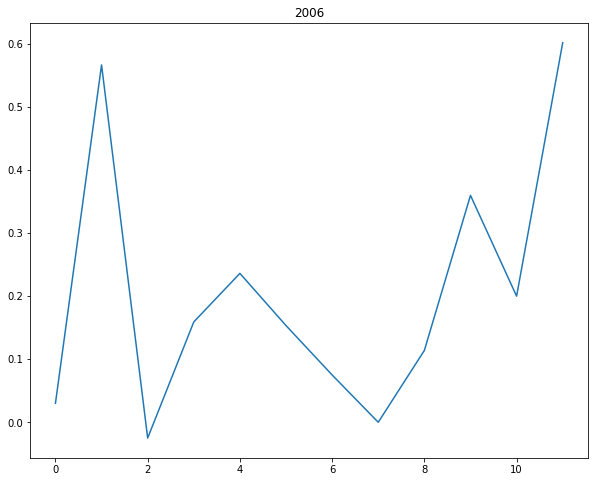

CPU times: user 173 ms, sys: 251 µs, total: 173 ms
Wall time: 170 ms


In [61]:
%%time
# Mostramos solo el etalle del primer año
plt.plot(polarity_transcript[0])
plt.title(data_ln['full_name'].index[0])
plt.show()

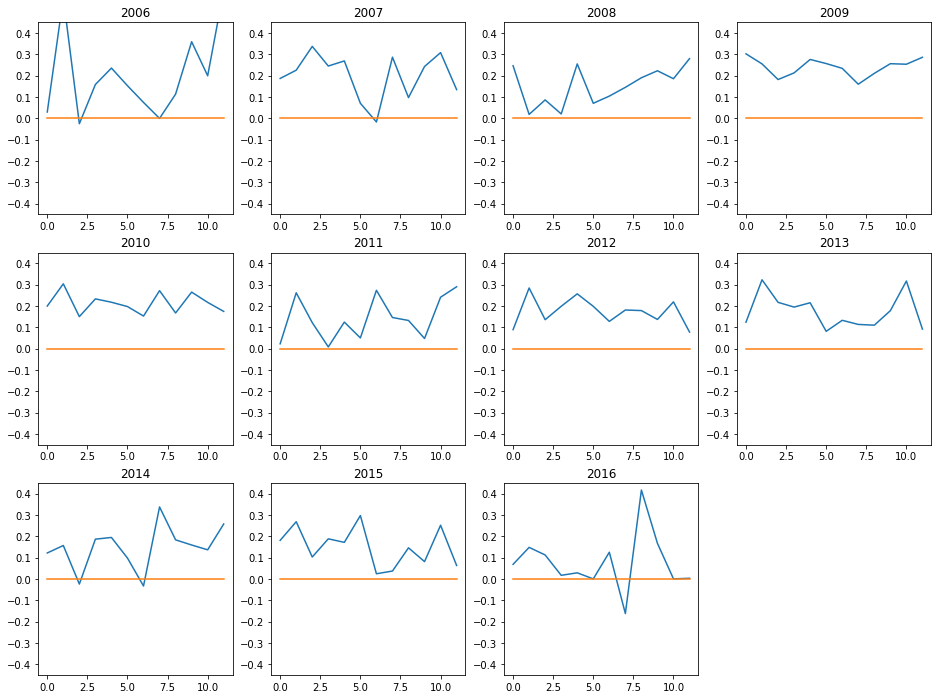

CPU times: user 1.1 s, sys: 7.91 ms, total: 1.11 s
Wall time: 1.1 s


In [62]:
%%time
# Hacemos todos los años
plt.rcParams['figure.figsize'] = [16, 12]

for index, anio in enumerate(data_ln.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,12), np.zeros(12))
    #plt.title(data['full_name'][index])
    plt.title(anio)
    plt.ylim(ymin=-.45, ymax=.45)
    
plt.show()